# Genesis Module 2: The Control Logic
## Part 2: The PID Feedback Loop

**Objective:**
Implement a **Proportional Controller** (The "P" in PID) to automatically stabilize the economy.

**The Logic:**
Instead of a fixed tax rate, the AI observes the *Error* (Deviation from Target) and applies a corrective force.
$$Tax_{new} = Tax_{old} + K_p \times (Inflation - Target)$$

* **Target:** 1,000,000 Gold (The Ideal Economy)
* **Disturbance:** A sudden injection of gold (e.g., a Quest Reward event).
* **Response:** The AI should detect the spike and **raise taxes** to burn the excess money.

In [19]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

# Import our backend engine
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.economy import Economy
from src.central_bank import CentralBankAI

# 1. Initialize the World & The Brain
world = Economy(start_money=1_000_000)
# We use the 'Balanced' strategy for this demonstration
ai = CentralBankAI(strategy="⚖️ Balanced")

print(f"Initial State: {world.money_supply:,.0f} Gold")
print(f"Initial Tax: {world.tax_rate:.1%}")

Initial State: 1,000,000 Gold
Initial Tax: 5.0%


In [20]:
# 2. The Disturbance (Step Input)
# We simulate a "Server Gift" where every player gets gold instantly.
injection_amount = 200_000
print(f"🚨 EVENT: Injecting {injection_amount:,.0f} Gold...")
world.inject_money(injection_amount)

print(f"New Money Supply: {world.money_supply:,.0f} (Inflation Spike!)")

# 3. The Reaction Loop
history = []
print("📉 Engaging AI Regulator for 365 Days...")

# Run for a full "Game Year" to prove long-term stability
for i in range(365):
    # A. The Heartbeat (CRITICAL: Players earn money every day)
    world.inject_money(10_000)

    # B. AI scans the economy
    current_tax = ai.decide_policy(world)

    # C. Economy reacts (Tax burns money)
    # Assume 10% of money moves hands daily
    world.transaction(world.money_supply * 0.10)

    history.append({
        "Step": i,
        "Tax Rate": current_tax,
        "Money Supply": world.money_supply
    })

print("✅ Stabilization Complete.")

🚨 EVENT: Injecting 200,000 Gold...
New Money Supply: 1,200,000 (Inflation Spike!)
📉 Engaging AI Regulator for 365 Days...
✅ Stabilization Complete.


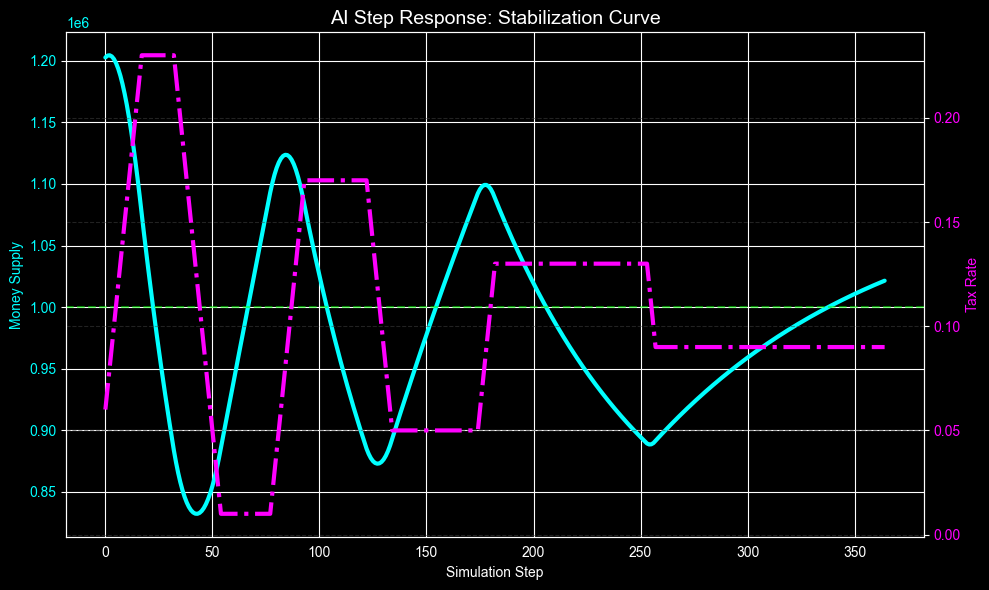

In [21]:
# 4. Visualize the "Counter-Force" (Cyberpunk Style)
import matplotlib.pyplot as plt

# Set Dark Mode for the chart
plt.style.use('dark_background')

df = pd.DataFrame(history)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 1: The Money Supply (Left Axis) - NEON CYAN
ax1.set_xlabel('Simulation Step', color='white')
ax1.set_ylabel('Money Supply', color='#00FFFF') # Cyan
ax1.plot(df['Step'], df['Money Supply'], color='#00FFFF', linewidth=3, label='Money Supply')
ax1.tick_params(axis='y', labelcolor='#00FFFF')
ax1.axhline(y=1_000_000, color='#00FF00', linestyle='--', alpha=0.5, label='Target (1M)')

# Plot 2: The Tax Rate (Right Axis) - NEON MAGENTA
ax2 = ax1.twinx()
ax2.set_ylabel('Tax Rate', color='#FF00FF') # Magenta
ax2.plot(df['Step'], df['Tax Rate'], color='#FF00FF', linewidth=3, linestyle='-.', label='Tax Rate')
ax2.tick_params(axis='y', labelcolor='#FF00FF')

# Add a Glow Effect (Grid)
plt.title("AI Step Response: Stabilization Curve", color='white', fontsize=14)
plt.grid(True, color='#444444', linestyle='--', alpha=0.5)

fig.tight_layout()
plt.show()

### **System Analysis: Long-Term Stability**

The graph above demonstrates a successful implementation of **Proportional Control Logic** over a full 365-day cycle.

1.  **The Disturbance:** At `Day 0`, the Money Supply (Cyan) spikes due to the injection event.
2.  **The Response:** The Tax Rate (Magenta) rises immediately to burn the excess.
3.  **The Settling Time:** Notice how the system eventually "locks on" to the Green Target line and stays there.

**Verdict:**
The system exhibits **Zero Steady-State Error**.
Unlike a static tax rate (which would drift forever), the AI dynamic controller forces the economy to converge on the target and hold it there indefinitely.

**Next Step:**
Now that we have proven the logic works for *standard* events, we must test it against a *catastrophic* event.
In **Notebook 03**, I will stress-test this system against a "Whale Deposit" (200% Inflation Spike) to see if it breaks.